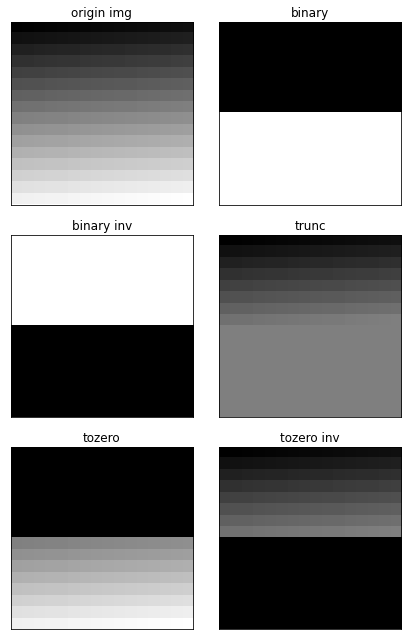

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

title_thresh = [('binary',cv2.THRESH_BINARY),
                ('binary inv',cv2.THRESH_BINARY_INV),
                ('trunc',cv2.THRESH_TRUNC),
                ('tozero',cv2.THRESH_TOZERO),
                ('tozero inv',cv2.THRESH_TOZERO_INV)]

rup = np.arange(256).reshape(16,16).astype(np.float32)
# print(rup)
plt.figure(figsize=[6,9])
plt.subplot(321,xticks=[],yticks=[])
plt.title('origin img')
plt.imshow(rup, cmap='gray')

for i, (title,thresh) in enumerate(title_thresh):
    plt.subplot(322+i, title=title, xticks=[], yticks=[])
    ret, rup_thr = cv2.threshold(rup, 127, 255, thresh)
    plt.imshow(rup_thr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()
    

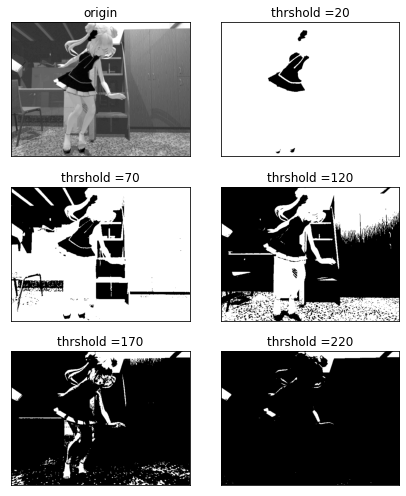

In [9]:
rin = cv2.imread('rin.jpg',0)
plt.figure(figsize=[6,7])
plt.subplot(321,xticks=[],yticks=[])
plt.title('origin')
plt.imshow(rin,cmap='gray')

for i in range(5):
    ret, rin_th = cv2.threshold(rin, 20+i*50, 255, cv2.THRESH_BINARY)
    plt.subplot(322+i, title='thrshold =%d'%ret, xticks=[],yticks=[])
    plt.imshow(rin_th, cmap='gray')
    
plt.tight_layout()
plt.show()

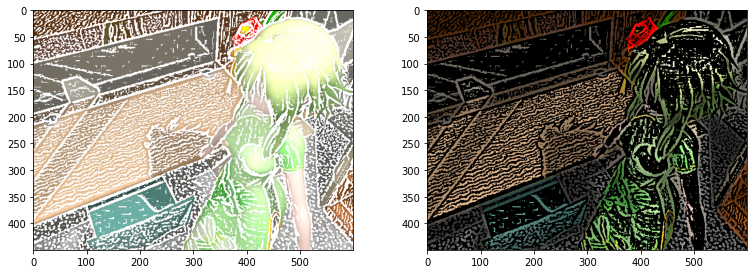

In [28]:
gumi = cv2.imread('gumi.jpg',cv2.IMREAD_COLOR)
gumi = gumi[:,:,::-1]
gumi_gray = cv2.cvtColor(gumi, cv2.COLOR_BGR2GRAY)

gumi_thr = cv2.adaptiveThreshold(gumi_gray, 255,
                               cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,
                                9, 1)
cv2.imwrite('gumiLight.jpg', np.where(gumi_thr[:,:,None]==255, gumi, 255))
# np.where is ternary operation

plt.figure(figsize=[20,15])

plt.subplot(331)
plt.imshow(np.where(gumi_thr[:,:,None]==255, gumi, 255))

cv2.imwrite('gumiDark.jpg', np.where(gumi_thr[:,:,None]==0, gumi, 0))
plt.subplot(332)
plt.imshow( np.where(gumi_thr[:,:,None]==0, gumi, 0))

# plt.tight_layout()
plt.show()